In [1]:
import spintrace                               # imports the library

In [2]:
# # Initialize the Downloader class
# downloader = spintrace.Downloader(
#     csv_file='Haumea/table_Haumea-system-barycenter20136108.csv', # Path to your metadata file.
#     path_to_save_fits='Haumea/fits_tables/',                      # Folder to save the FITS files.
#     max_workers=5,                                                # Number of parallel downloads.
#     # ptype='scimrefdiffing',                                     # Type of ZTF product, this one refers to difference images (science-template).
#     verbose=False)                                                # Print potential warning messages.

# downloader.download_fits()                                        # Donwloads the FITS tables containing multiple PSF photometries. 
# # downloader.download_fits(ptype='scimrefdiffing')                # Donwloads the science-template image (FITS cube).

In [3]:
fits_files = spintrace.get_files('Haumea/fits_tables/') #Creates a list of FITS files.
# Defines the targeted small body.
body = spintrace.Body(name="Haumea",                    # Small body oficial name.
                      ephem_start_date="2018-03-24",    # Ephemeris starting date.
                      ephem_end_date="2025-07-01")      # Ephemeris ending date.

In [4]:
# Haumea colors are not available, so they were set to zero
mpa = spintrace.MultiPhotometryAnalysis(
    fits_files=fits_files,              # List of FITS table files donwloaded before.
    body=body,                          # Haumea body as defined above.
    colors={'g-r': 0.0,'r-i':0.0},      # Neutral or real color terms.
    color_errs={'g-r': 0.0,'r-i':0.0},  # Corresponding uncertainties.
    v_tol=1.0)                          # Magnitude tolerance for PSF matching.
mpa.run_analysis(check_close_stars=True)

2025-08-13 19:10:47,628 - INFO - Found existing Gaia stars final file: Haumea/gaia_closeby_stars.fits	 Skipping Gaia query and loading existing results...
2025-08-13 19:10:47,696 - INFO - Removing rows where a Gaia star is ≤ 4" from the asteroid's expected position.


Filtered table has 1666 rows after filtering.


In [5]:
# Initiates the Plots class
plots = spintrace.Plots(table = mpa.reduced_table, # Table obtained above.
                    ast_name='Haumea',         # Asteroid name.
                    fontsize=16)               # Fontsize to be used in the plots. 

In [6]:
# This method fits a phase function to a set of reduced magnitudes, returning the parameter (popt) and labels using all data and binned data as well. 
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='g', # g-SDSS filter.
                                                               phase_bin=0.1)   # Phase angle will be binned by this number.

plots.phase_curve(filter_code='g',                                              # g-SDSS filter.
                  popt=popt,                                                    # H and beta fitted above using all points.
                  fit_label=fit_label,                                          # Labels. 
                  popt2=popt2,                                                  # H and beta fitted above using binned points.
                  fit_label_binned=fit_label_binned,                            # Labels.
                  show_yerr=True,                                               # Activate individual points photometric error bars in the plot. 
                  show_color=True,                                              # 
                  save_path='Haumea/plots/Haumea_phase_curve_g_linear.jpg')     # Path to save the plot. 

Figure saved to Haumea/plots/Haumea_phase_curve_g_linear.jpg


In [7]:
# This method fits a phaase function to a set of reduced magnitudes, returning the parameter (popt) and labels using all data and binned data as well. 
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='i', # i-SDSS filter.
                                                               phase_bin=0.1)   # Phase angle will be binned by this number.

plots.phase_curve(filter_code='i',                                              # i-SDSS filter.
                  popt=popt,                                                    # H and beta fitted above using all points.
                  fit_label=fit_label,                                          # Labels. 
                  popt2=popt2,                                                  # H and beta fitted above using binned points.
                  fit_label_binned=fit_label_binned,                            # Labels.
                  show_yerr=True,                                               # Activate individual points photometric error bars in the plot. 
                  show_color=True,                                              # 
                  save_path='Haumea/plots/Haumea_phase_curve_i_linear.jpg')     # Path to save the plot. 

Figure saved to Haumea/plots/Haumea_phase_curve_i_linear.jpg


In [8]:
# This method fits a phaase function to a set of reduced magnitudes, returning the parameter (popt) and labels using all data and binned data as well. 
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='r', # r-SDSS filter.
                                                               phase_bin=0.1)   # Phase angle will be binned by this number.

plots.phase_curve(filter_code='r',                                              # r-SDSS filter.
                  popt=popt,                                                    # H and beta fitted above using all points.
                  fit_label=fit_label,                                          # Labels. 
                  popt2=popt2,                                                  # H and beta fitted above using binned points.
                  fit_label_binned=fit_label_binned,                            # Labels.
                  show_yerr=True,                                               # Activate individual points photometric error bars in the plot. 
                  show_color=True,                                              # 
                  save_path='Haumea/plots/Haumea_phase_curve_r_linear.jpg')     # Path to save the plot. 

Figure saved to Haumea/plots/Haumea_phase_curve_r_linear.jpg


In [9]:
# Looking the plots user can verify the fits and get the H and beta values to correct each data set by the solar phase angle effects. 
table_g = mpa.fit_phase_curve(filter_code='g',H=0.54,G=0.09)
table_i = mpa.fit_phase_curve(filter_code='i',H=0.00,G=0.13)
table_r = mpa.fit_phase_curve(filter_code='r',H=0.07,G=0.13)

Fit result for g filter using original data and linear model:
Original data linear fit: H = 0.54, G = 0.09
Fit result for i filter using original data and linear model:
Original data linear fit: H = 0.00, G = 0.13
Fit result for r filter using original data and linear model:
Original data linear fit: H = 0.07, G = 0.13


In [10]:
# Merge the corrected-by-phase angle data into a single data set
from astropy.table import vstack
merged_table = vstack ([table_g,table_r,table_i])

In [11]:
# Plots the entire data set for visual inspection.
plots.general(x_column='jd_lt_corr',
              y_column='phase_corrected_mag',
              show_yerr=True,
              show_color=True,
              color_column='filter_code',
              table=merged_table,
              save_path='Haumea/plots/Haumea_phase_corrected_all.jpg'
             )

Figure saved to Haumea/plots/Haumea_phase_corrected_all.jpg


In [12]:
# Initiate the rotational analysis class
rot = spintrace.RotationalAnalysis(table=merged_table, # Merged data set.
                                   P_ref=3.915341,     # Haumea's published rotational period.
                                   f_min=4.0,          # Minimum frequency (cycles/day).
                                   f_max=12.0,         # Maximum frequency (cycles/day).
                                   n_term=2)           # Fourier terms as required by Astropy LombScargle function.
# Search for periodicity in combined data set.
f, p, f_win, p_win = rot.lomb_scargle_fit(asteroid=body.name,   # Asteroid name.
                                         use_magerr=True,      # Uses error bars to weight the points during the search. 
                                         delta_t=0.00015,      # Draw vertical lines surrouing the main periodogram peak.
                                         filter_code=None,
                                         samples_per_peak=100, # Optional, allow user to inclease periodic search sampling.
                                         peaks=True,           # Optional, print numbers in the 4 highest peaks and also their frequencies in the screen.
                                         # n_shuffle=100,      # Optional, shuffle test. 
                                         use_window_function=True,# Optional, observational window test. 
                                         save_path='Haumea/plots/Haumea_periodogram_broad.jpg', # Path to save the plot. 
                                         legend=True) # Show periodogram legend. 

1: Period = 3.915341 hours, Power = 0.850784
2: Period = 3.365541 hours, Power = 0.577103
3: Period = 2.339922 hours, Power = 0.567469
4: Period = 4.679842 hours, Power = 0.564855


In [13]:
# Computing the light curve model with a given date for rotational phase zero.
import numpy as np
model_params = rot.compute_phased_model(JD = np.array(rot.table['jd_lt_corr']),
                                        mag = np.array(rot.table['phase_corrected_mag']),
                                        best_freq = rot.best_freq,
                                        epoch0 = 2458202.5695942747) # 2018-03-25 01:40:13-Time of the first valid data point.

In [14]:
# Plotting the rotational light curve model and folded data points
df = plots.folded_lightcurve(asteroid=body.name,                                      # Asteroid name.
                            table=rot.table,                                          # Table from periodicity search.
                            filter_codes=np.array(rot.table['filter_code']),          # Filter column. 
                            JD=np.array(rot.table['jd_lt_corr']),                     # Time column.
                            model_params=model_params,                                # Lc model build above for the same reference time instant.
                            corrected_mag=np.array(rot.table['phase_corrected_mag']), # Magnitudes column. 
                            mag_err=np.array(rot.table['mag_cal_err']),               # Magnitude error column.
                            best_freq=rot.best_freq,                                  # Best frequency to fold data points.
                            save_path='Haumea/plots/Haumea_lc_folded.jpg',            # Path to save the plot. 
                            epoch_zero=2458202.5695942747,                            # 2018-03-25 01:40:13-Time of the first valid data point.
                            show_fig=True)                                            # Show the figure in the screen as an interactive plot ?

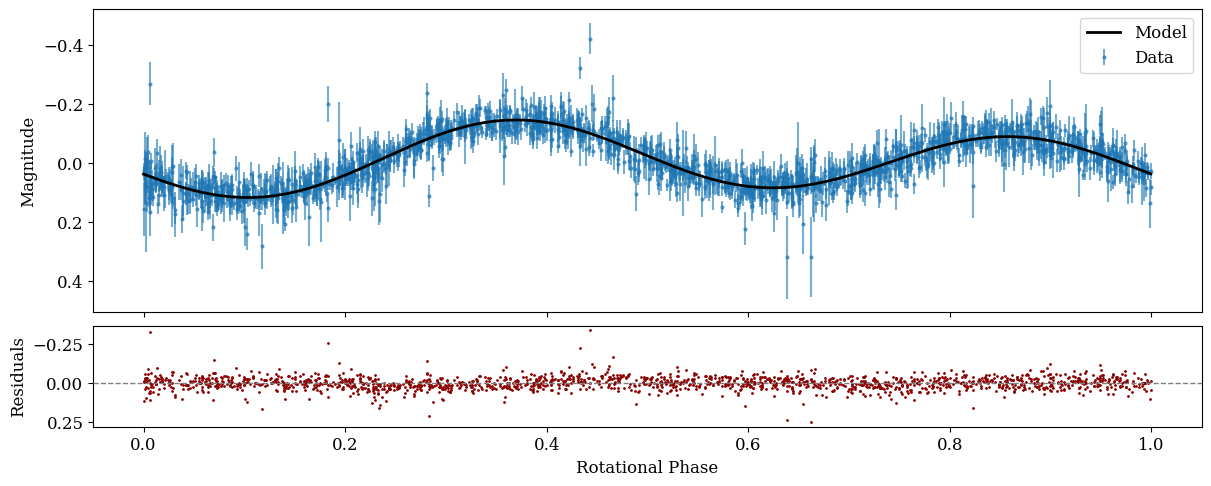

In [15]:
# Optionally, user can do a plot with rotational light curve and the residuals.
df['residuals'] = df['Magnitude']-df['model_mag']
plots.plot_folded_lightcurve_with_residuals(df,save_path='Haumea/plots/Haumea_folded_light_curve_with_residuals.jpg',fontsize=12)

In [16]:
# Calculate the residuals standard deviation
std = np.std(df['residuals'])
print(std)

0.042178077756372195


In [17]:
# Here we want to correct the reduced magnitude for Haumea rotational modulation using the previously defined model and save them into a new table. 
final_tab = rot.get_detrended_magnitudes()

In [18]:
# Using the corrected-by-rotational modulation data, user may want to obtain the H and beta values again
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='g',
                                                               phase_bin=0.1,
                                                               table=final_tab,
                                                               mag_col='mag_corr_by_rot')


plots.phase_curve(filter_code='g',
                  popt=popt, 
                  fit_label=fit_label, 
                  popt2=popt2, 
                  fit_label_binned=fit_label_binned,
                  show_yerr=True,
                  show_color=True,
                  table=final_tab,
                  y_column='mag_corr_by_rot',
                  ylim=[1.0,0.2],
                  bkg=False,
                  bkg_data=True,
                  # label=False,
                  width = 1050,
                  height =325,
                  save_path='Haumea/plots/Haumea_phase_curve_g_linear_corr.jpg')

Figure saved to Haumea/plots/Haumea_phase_curve_g_linear_corr.jpg


In [19]:
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='i',
                                                               phase_bin=0.1,
                                                               table=final_tab,
                                                               mag_col='mag_corr_by_rot')


plots.phase_curve(filter_code='i',
                  popt=popt, 
                  fit_label=fit_label, 
                  popt2=popt2, 
                  fit_label_binned=fit_label_binned,
                  show_yerr=True,
                  show_color=True,
                  table=final_tab,
                  y_column='mag_corr_by_rot',
                  ylim=[0.4,-0.2],
                  bkg=False,
                  bkg_data=True,
                  # label=False,
                  width = 1050,
                  height =325,
                  save_path='Haumea/plots/Haumea_phase_curve_i_linear_corr.jpg')

Figure saved to Haumea/plots/Haumea_phase_curve_i_linear_corr.jpg


In [20]:
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='r',
                                                               phase_bin=0.1,
                                                               table=final_tab,
                                                               mag_col='mag_corr_by_rot')


plots.phase_curve(filter_code='r',
                  popt=popt, 
                  fit_label=fit_label, 
                  popt2=popt2, 
                  fit_label_binned=fit_label_binned,
                  show_yerr=True,
                  show_color=True,
                  table=final_tab,
                  y_column='mag_corr_by_rot',
                  ylim=[0.7,-0.35],
                  bkg=False,
                  bkg_data=True,
                  # label=False,
                  width = 1050,
                  height =325,
                  save_path='Haumea/plots/Haumea_phase_curve_r_linear_corr.jpg')

Figure saved to Haumea/plots/Haumea_phase_curve_r_linear_corr.jpg


In [21]:
table_g_corr = mpa.fit_phase_curve(filter_code='g',
                            model='linear',
                            H=0.54,G=0.1,
                            table=final_tab,
                            mag_col='mag_corr_by_rot')

Fit result for g filter using original data and linear model:
Original data linear fit: H = 0.54, G = 0.10


In [22]:
table_i_corr = mpa.fit_phase_curve(filter_code='i',
                            model='linear',
                            H=0.0,G=0.13,
                            table=final_tab,
                            mag_col='mag_corr_by_rot')

Fit result for i filter using original data and linear model:
Original data linear fit: H = 0.00, G = 0.13


In [23]:
table_r_corr = mpa.fit_phase_curve(filter_code='r',
                            model='linear',
                            H=0.1,G=0.1,
                            table=final_tab,
                            mag_col='mag_corr_by_rot')

Fit result for r filter using original data and linear model:
Original data linear fit: H = 0.10, G = 0.10


In [24]:
merged_table_corr = vstack([table_g_corr,table_r_corr,table_i_corr]) # 
len(merged_table_corr)

1631

In [25]:
plots.general(x_column='phase_angle',
              y_column='phase_corrected_mag',
              show_yerr=True,
              show_color=True,
              color_column='filter_code',
              table=merged_table_corr,
              save_path='Haumea/plots/Haumea_phase_corrected_all_last.jpg')

Figure saved to Haumea/plots/Haumea_phase_corrected_all_last.jpg


In [26]:
plots.general(x_column='jd_lt_corr',
              y_column='phase_corrected_mag',
              show_yerr=True,
              show_color=True,
              color_column='filter_code',
              table=merged_table_corr)

# END

In [27]:
rotational_analysis2 = ZTFrc.RotationalAnalysis(table=merged_table_corr, 
                                                P_ref=1187.088,f_min=0.01,f_max=0.08,n_term=1)

a,b,c,d = rotational_analysis2.lomb_scargle_fit(asteroid='Hiiaka', 
                                     filter_code=None,
                                     use_magerr=True,
                                     save_path=string+'_Hiiaka_periodogram_broad.jpg',
                                     legend=True, 
                                     # delta_t=6,
                                     samples_per_peak=400,
                                      peaks=True, 
                                      pn=3,
                                      y_max=0.2,
                                      n_shuffle=10,
                                      use_window_function=True,
                                      table=rotational_analysis2.table)

NameError: name 'ZTFrc' is not defined

In [ ]:
model_params_res = rotational_analysis2.compute_phased_model(JD = np.array(rotational_analysis2.table['jd_lt_corr']), 
                                                        mag = np.array(rotational_analysis2.table['phase_corrected_mag']),
                                                        best_freq = rotational_analysis2.best_freq ,
                                                        epoch0=2458202.5695942747 # 2018-03-25 01:40:13 first valid data point
                                                       )
            
df_res = plots.folded_lightcurve(asteroid='Residuals',
                                table = rotational_analysis2.table,
                                filter_codes=np.array(rotational_analysis2.table['filter_code']),
                                JD=np.array(rotational_analysis2.table['jd_lt_corr']),  
                                model_params=model_params_res, 
                                corrected_mag=np.array(rotational_analysis2.table['phase_corrected_mag']),
                                mag_err=np.array(rotational_analysis2.table['mag_cal_err']),
                                best_freq = rotational_analysis2.best_freq, 
                                save_path=string+'_Hiiaka_lightcurve_t2.jpg', 
                                shev = None,
                                epoch_zero=2458202.5695942747, # 2018-03-25 01:40:13 first valid data point
                                show_fig=True)

In [ ]:
df_res['residuals'] = df_res['Magnitude']-df_res['model_mag']

In [ ]:
plots.plot_folded_lightcurve_with_residuals(df_res,save_path=string+'Hiiaka_folded_light_curve_with_residuals.jpg')

In [ ]:
def paper_periodogram_zoomed(broad, best_freq, zoom_ranges, full_xlim=None, ylim=1.0,
                              save_path=None, error=1, shuffle_value=0.024):
    """
    Plots a periodogram with one broad view and one zoomed-in panel.

    Parameters
    ----------
    broad : array-like
        2D array where broad[0] = frequency, broad[1] = power, broad[3] = window function.
    best_freq : float
        Best-fit frequency (in cycles/day).
    zoom_ranges : list of tuple
        List of 1 or more tuples: each (xmin, xmax) in hours for zoom panels.
    full_xlim : tuple or list of float, optional
        X-axis range for top panel (broad view). If None, inferred from data.
    ylim : float
        Maximum y-axis value.
    save_path : str or None
        If provided, saves the figure to this path.
    """
    FF = 10  # font size

    fig = plt.figure(figsize=[12, 3.75])
    gs = gridspec.GridSpec(2, 1, hspace=0.3)

    def add_subplot(row, xlim, band_text, highlights=None, show_x=False, show_lines=False):
        ax = fig.add_subplot(gs[row, 0])
        ax.plot(24 / broad[0], broad[1], color='r', alpha=1.0, label='Data')
        ax.fill_between(24 / broad[0], broad[3], 0, color='gray', alpha=0.5, label='Window effect')
        ax.axhline(0, color='k')
        ax.set_xlim(xlim)
        ax.set_ylim(0, ylim)
        ax.set_ylabel('LS Power', fontsize=FF)
        ax.tick_params(labelsize=FF)
        ax.text(0.03, 0.90, band_text, transform=ax.transAxes, fontsize=FF, ha='left', va='center')

        if highlights:
            for x0, x1, color in highlights:
                ax.fill_betweenx([0, ylim], x0, x1, color=color, alpha=0.2)

        if show_lines:
            ax.axvline((24 / best_freq) - error[0], linestyle=':', color='k')
            ax.axvline((24 / best_freq) + error[0], linestyle=':', color='k')

        if show_x:
            ax.set_xlabel('Rotational Period (hours)', fontsize=FF)

        if row == 0:
            ax.axhline(shuffle_value, linestyle='--', color='darkblue')
            ax.legend(fontsize=FF, loc='upper right', ncol=2)

    # Define default full_xlim if not given
    if full_xlim is None:
        full_xlim = (np.min(24 / broad[0]), np.max(24 / broad[0]))

    # Plot top panel (broad view) with both zoom ranges highlighted
    highlight_colors = ['blue', 'green']
    highlights = [
        (zoom_ranges[0][0], zoom_ranges[0][1], highlight_colors[0]),
        # (zoom_ranges[1][0], zoom_ranges[1][1], highlight_colors[1])
    ]
    add_subplot(row=0, xlim=full_xlim, band_text='A)', highlights=highlights)

    # Plot only one zoomed-in panel (use first zoom_range)
    add_subplot(row=1, xlim=zoom_ranges[0], band_text='B)', show_x=True, show_lines=True)

    if save_path:
        plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()


In [ ]:
Data0 = np.column_stack((a, b, c, d))
Data0 = Data0.T

In [ ]:
paper_periodogram_zoomed(
        broad=Data0,
        # full_xlim =[300,1700],
        best_freq=rotational_analysis2.best_freq,  # cycles/day
        zoom_ranges=[(500, 680), (1050, 1300)],  # periods in hours
        ylim=0.15,
        error = [9,14],
        save_path=string+'Hiiaka_paper.jpg'
)